# Imports

In [73]:
from sklearn.datasets import make_classification, make_circles, make_gaussian_quantiles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Gerando Dados

In [ ]:
import numpy as np
X, y = make_gaussian_quantiles(n_samples=1000,n_features=2, n_classes=3, random_state=12, cov=1)


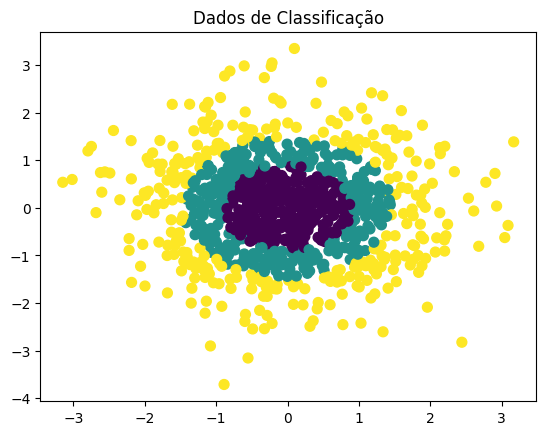

In [188]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.title('Dados de Classificação');

In [189]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#normalizando os dados
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std
print(f'Tamanho do conjunto de treino: {x_train.shape}')
print(f'Tamanho do conjunto de teste: {x_test.shape}')

Tamanho do conjunto de treino: (800, 2)
Tamanho do conjunto de teste: (200, 2)


# Treinando classificador

Training binary classifiers: 100%|██████████| 3/3 [00:00<00:00,  3.89it/s, Par=1 vs 2]


Acurácia de treino: 0.96
Acurácia de teste: 0.95


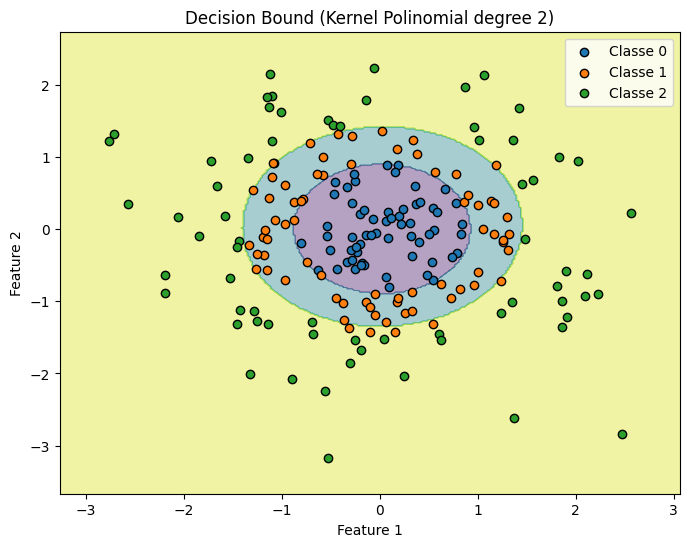

In [204]:
from CLog_MC_OvO import CLog_OVO
from utils import plot_decision_boundary

# Parâmetros do classificador
kernel = 2
model = CLog_OVO(kernel=kernel, step=0.005, n_iter=1000, batch_size=64, iterative=False,mode='dual')
# Treinamento
model.fit(x_train, y_train)

# Avaliação
y_pred = model.predict(x_train)
# Avaliação
accuracy = accuracy_score(y_train, y_pred)
print(f'Acurácia de treino: {accuracy:.2f}')


# Previsões
y_pred = model.predict(x_test)
# Avaliação
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia de teste: {accuracy:.2f}')
# Plotando os dados de teste e as previsões
plot_decision_boundary(model, x_test, y_test, resolution=300)